In [8]:
import boto3
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
# create IoT Analytics client
client = boto3.client('iotanalytics')

# get dataset object
dataset_name = "lab4_dataset"
dataset = client.get_dataset_content(datasetName=dataset_name)

# get pandas data frame
df = pd.read_csv(dataset['entries'][0]['dataURI'])

In [5]:
# Display basic statistics about the dataset
print("Dataset statistics:")
print("===================")
df.describe()

Dataset statistics:


,timestep_time,vehicle_co,vehicle_co2,vehicle_hc,vehicle_nox,vehicle_pmx,vehicle_angle,vehicle_electricity,vehicle_fuel,vehicle_noise,vehicle_pos,vehicle_speed,vehicle_waiting,vehicle_x,vehicle_y
count,12.00000,12.000000,12.000000,12.000000,12.000000,12.000000,12.00000,12.0,12.000000,12.000000,12.000000,12.00000,12.0,12.000000,12.000000
mean,4.50000,60.748333,3376.105000,0.352500,1.426667,0.062500,212.69750,0.0,1.450000,62.989167,17.115833,9.52000,0.0,19210.483333,24557.300833
std,2.54058,63.680320,3235.045715,0.368242,1.404288,0.065105,152.80316,0.0,1.389074,6.731006,17.385078,2.97521,0.0,3162.018214,29.826843
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,34.08000,0.0,0.000000,48.520000,3.900000,4.77000,0.0,18279.940000,24476.790000
25%,2.75000,0.000000,0.000000,0.000000,0.000000,0.000000,42.25000,0.0,0.000000,59.747500,4.702500,8.05000,0.0,18293.730000,24550.245000
50%,5.00000,55.565000,4048.650000,0.325000,1.590000,0.060000,317.63000,0.0,1.740000,66.130000,10.045000,8.50500,0.0,18300.150000,24566.245000
75%,6.25000,126.410000,5843.880000,0.710000,2.500000,0.110000,332.22000,0.0,2.510000,67.660000,21.977500,10.98000,0.0,18305.540000,24576.090000
max,8.00000,126.950000,7523.470000,0.760000,3.240000,0.150000,359.62000,0.0,3.230000,69.250000,57.740000,14.72000,0.0,29251.210000,24584.320000


In [13]:
# show field names
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   timestep_time        1500 non-null   float64
 1   vehicle_co           1500 non-null   float64
 2   vehicle_co2          1500 non-null   float64
 3   vehicle_hc           1500 non-null   float64
 4   vehicle_nox          1500 non-null   float64
 5   vehicle_pmx          1500 non-null   float64
 6   vehicle_angle        1500 non-null   float64
 7   vehicle_eclass       1500 non-null   object 
 8   vehicle_electricity  1500 non-null   float64
 9   vehicle_fuel         1500 non-null   float64
 10  vehicle_id           1500 non-null   object 
 11  vehicle_lane         1500 non-null   object 
 12  vehicle_noise        1500 non-null   float64
 13  vehicle_pos          1500 non-null   float64
 14  vehicle_route        1500 non-null   object 
 15  vehicle_speed        1500 non-null   f

In [14]:
# Remove duplicate records by: 'timestep_time' and 'device_id'
df = df.drop_duplicates(subset=['device_id', 'timestep_time'], keep='first')

CO2 readings across time for each of the vehicles.

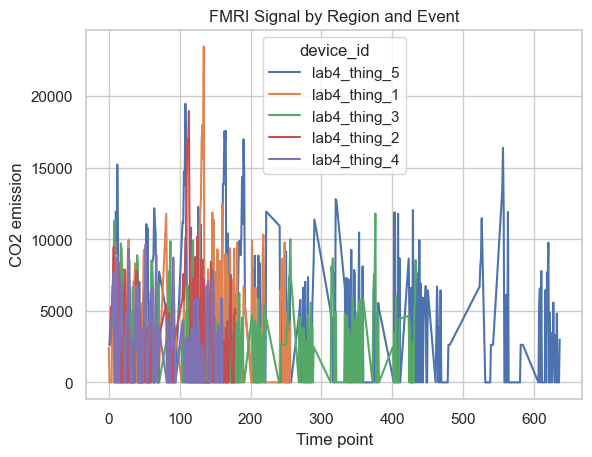

In [16]:
sns.set_theme(style="whitegrid")
# Plot a multiline graph using the lineplot function
sns.lineplot(x='timestep_time', y='vehicle_co2', hue='device_id', data=df)

# Add labels and title
plt.xlabel('Time point')
plt.ylabel('CO2 emission')
plt.title('CO2 readings across time.')

# Show the plot
plt.show()

For a particular vehicle the graph below shows the relation of CO2 emissions with multiple facets:
noise, fuel and speed. For instance, as the fuel becomes less or more rich the CO2 readings also change.

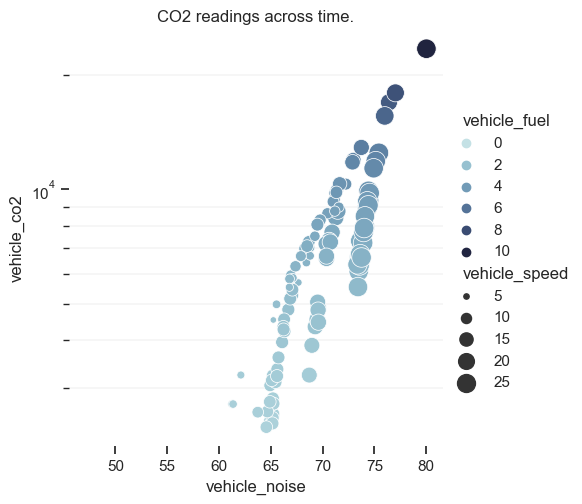

In [53]:
vehicle_1 = df[df["device_id"] == "lab4_thing_1"]
cmap = sns.cubehelix_palette(rot=-.2, as_cmap=True)
g = sns.relplot(
    data=vehicle_1,
    x="vehicle_noise", y="vehicle_co2",
    hue="vehicle_fuel", size="vehicle_speed",
    palette=cmap, sizes=(10, 200),
)
g.set(yscale="log")
g.set(title='CO2 readings across time.')
g.ax.xaxis.grid(True, "minor", linewidth=.25)
g.ax.yaxis.grid(True, "minor", linewidth=.25)
g.despine(left=True, bottom=True)

We can compare the CO2 emissions median and interquartile range (IQR) for the vehicles. Here the boxes are shifted towards 0, so it seems the CO2 readings are skewed, i.e. many readings are zero or close to zero.

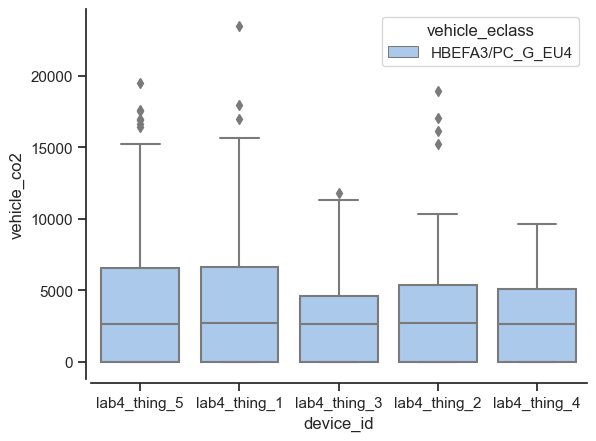

In [52]:

sns.boxplot(x="device_id", y="vehicle_co2",
            hue="vehicle_eclass",
            data=df)
sns.despine(offset=3, trim=False)